In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [2]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

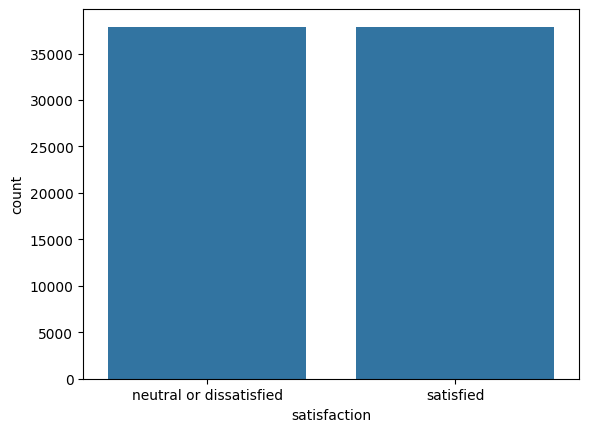

In [3]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [4]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,35,1199,0
75774,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,53,2556,3
75775,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,44,2842,0
75776,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,40,578,0


In [5]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75773    neutral or dissatisfied
75774    neutral or dissatisfied
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
Name: satisfaction, Length: 75778, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53044, 80) and test set is :(22734, 80)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17652737,  2.44792858, -0.49304411, ..., -1.42906388,
         0.7498532 , -0.5318908 ],
       [-0.17652737, -0.40850865, -0.49304411, ...,  0.17710925,
        -1.2113492 , -0.5318908 ],
       [-0.17652737, -0.40850865, -0.49304411, ..., -0.28179736,
        -1.00327581, -0.3898812 ],
       ...,
       [-0.17652737,  2.44792858, -0.49304411, ..., -0.74070397,
        -0.92978606,  0.60418601],
       [-0.17652737,  2.44792858, -0.49304411, ..., -1.35257945,
         0.81803044, -0.5318908 ],
       [-0.17652737, -0.40850865, -0.49304411, ..., -0.51125066,
        -0.64468124, -0.5318908 ]])

## Set paramiter CV

In [8]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.447544 วินาที


In [10]:
#Predict the accuracy of the model
y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 95.45 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     11355
              satisfied       0.96      0.95      0.95     11379

               accuracy                           0.95     22734
              macro avg       0.95      0.95      0.95     22734
           weighted avg       0.95      0.95      0.95     22734



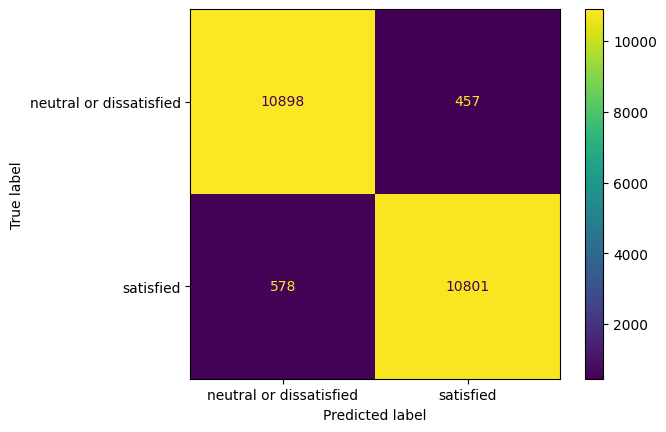

In [11]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

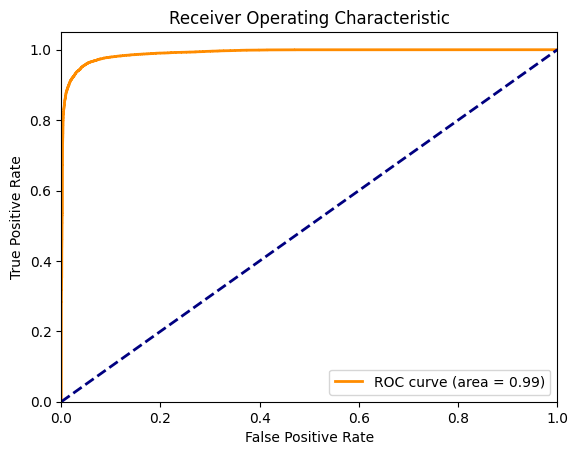

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_lr.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [13]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")


Cross Validation Scores (Logistic Regression): [0.9556121  0.95363302 0.95250212 0.95504665 0.95248869 0.95164027
 0.95984163 0.95757919 0.95786199 0.9533371  0.96069005 0.96040724
 0.95559955 0.95503394 0.95050905]
Mean CV Accuracy: 0.9555
Standard Deviation CV Accuracy: 0.0031
เวลาที่ใช้ในการทำ Cross Validation: 4.899359 วินาที


In [14]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9561496116431641
Test Accuracy: 0.9544734758511481


## Save Model Predic

In [15]:
import pickle
pickle_out = open("../../pipelines/model_LR_business.pkl", mode = "wb")
pickle.dump(model_lr, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_LR.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [16]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
17442,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,23,967,5,satisfied
48440,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,59,3263,0,satisfied
30482,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,25,1927,0,satisfied
37972,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,25,1066,0,neutral or dissatisfied
36638,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,22,931,0,satisfied
26881,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,16,3602,0,satisfied
56700,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,31,3067,0,neutral or dissatisfied
20667,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,39,1258,0,satisfied
36124,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,21,3523,0,satisfied
38659,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,59,3361,0,neutral or dissatisfied


In [17]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
17442,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,23,967,5
48440,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,59,3263,0
30482,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,25,1927,0
37972,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,25,1066,0
36638,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,22,931,0
26881,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,16,3602,0
56700,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,31,3067,0
20667,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,39,1258,0
36124,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,21,3523,0
38659,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,59,3361,0


In [18]:
y_sam = df_sam.iloc[:,-1]
y_sam


17442                  satisfied
48440                  satisfied
30482                  satisfied
37972    neutral or dissatisfied
36638                  satisfied
26881                  satisfied
56700    neutral or dissatisfied
20667                  satisfied
36124                  satisfied
38659    neutral or dissatisfied
63789    neutral or dissatisfied
74111    neutral or dissatisfied
72612    neutral or dissatisfied
45960                  satisfied
59463    neutral or dissatisfied
8027                   satisfied
58171    neutral or dissatisfied
41267                  satisfied
24853                  satisfied
34398    neutral or dissatisfied
Name: satisfaction, dtype: object

In [19]:
model = pickle.load(open("../../pipelines/model_LR_business.pkl", 'rb'))
scaler_LR = pickle.load(open("../../pipelines/scaler_LR.pkl", 'rb'))

scaler_new = scaler_LR.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of LR is : {round(accuracy_KNN*100,2)} % .")

['satisfied' 'satisfied' 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'satisfied' 'neutral or dissatisfied']
Accuracy of LR is : 100.0 % .
